In [58]:
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import chi2
import matplotlib.pyplot as plt
import seaborn as sb

In [59]:
plt.rcParams["figure.figsize"]=(10,3)
plt.rcParams["font.family"]="BM YEONSUNG"

In [60]:
# 이미 검사 완료한 column
already=['(가)건강 만족도', '(나)가족의 수입 만족도', '(다)주거 환경 만족도', '(라)가족관계 만족도', '(마)직업 만족도', '(바)사회적 친분관계 만족도', '(사)여가생활 만족도', '성별','교육수준', '종교']

In [61]:
D=pd.read_excel("./대표값위주스케일링.xlsx")
data=pd.DataFrame(D)
data.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'],inplace=True)

# 서열 척도가 아닌 명목변수(카테고리 내에서 확인)
혹은 대분류에서 다루지 않았던 것들 추가

## 건강 만족도 

In [62]:
cols=["(가)건강 만족도","만성질환","건강상태"]
other=[x for x in cols if x not in already]

### heat맵
> 각각에는 상관관계가 있어보이며, 특히 건강상태와 건강만족도 사이에는 강한 상관관계가 보인다

In [63]:
data[cols].corr(method='spearman').abs().style.background_gradient(cmap="PuBu")

,(가)건강 만족도,만성질환,건강상태
(가)건강 만족도,1.000000,0.371761,0.612478
만성질환,0.371761,1.000000,0.534669
건강상태,0.612478,0.534669,1.000000


### 독립성 검정(카이제곱)

In [64]:
result=chi2.chi2_try(data[cols])

In [65]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[(가)건강 만족도, 만성질환]",6.780674e-102,False
1,"[(가)건강 만족도, 건강상태]",0.000000e+00,False
2,"[만성질환, 건강상태]",2.557166e-229,False


## 주거 만족도 

In [66]:
col2=["주택유형","집의 (등기상) 점유형태","(다)주거 환경 만족도"]
other.extend([x for x in col2 if x not in already])
other

['만성질환', '건강상태', '주택유형', '집의 (등기상) 점유형태']

### 독립성 검정
> 서열척도가 아니므로 상관계수를 볼 수 없음

In [67]:
result2=chi2.chi2_try(data[col2])

In [68]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result2["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[집의 (등기상) 점유형태, (다)주거 환경 만족도]",5.958329e-19,False


#### 대표본 가정을 만족하지 못함
> 주택유형이 문제가 된듯

In [69]:
[x["Pairs"] for x in result2["type3"]]

[['주택유형', '집의 (등기상) 점유형태'], ['주택유형', '(다)주거 환경 만족도']]

#### 시각화

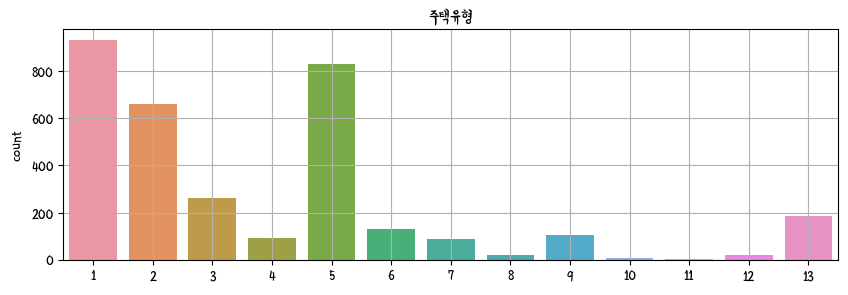

In [13]:
visual=data[['주택유형']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("주택유형")
plt.grid()
plt.show()

#### 변수통일
|변경된 변수|이전 변수|
|--|--|
|9. 오피스텔|9.오피스텔|
||10. 오피스텔|
|12. 기타|11. 임시가건물(건테이너 등)|
||12. 기타|
||8. 비거주용 건물 내 주택(상가,공장 등)|

In [14]:
def trans(x):
    if x in [9,10]:
        return 9
    elif x in [11,12,8]:
        return 12
    else:
        return x

In [15]:
data["주택유형"]=data["주택유형"].apply(trans)

#### 변경 후 시각화

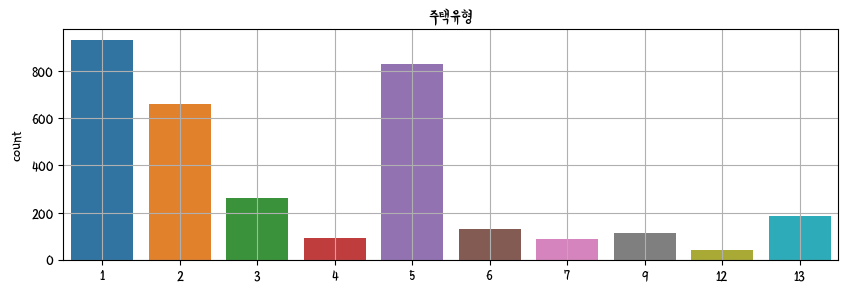

In [16]:
visual=data[['주택유형']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("주택유형")
plt.grid()
plt.show()

#### 변경 후 독립성 검정

In [17]:
result=chi2.chi2_try(data[col2])

In [18]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.1

In [19]:
Indep

,검정대상,pvalue,독립성
0,"[주택유형, 집의 (등기상) 점유형태]",0.000000e+00,False
1,"[주택유형, (다)주거 환경 만족도]",1.965955e-21,False
2,"[집의 (등기상) 점유형태, (다)주거 환경 만족도]",5.958329e-19,False


### 근로 만족도

In [20]:
col3=["(마)직업 만족도","근로유형"]
other.extend([x for x in col3 if x not in already])

In [21]:
result3=chi2.chi2_try(data[col3])

In [22]:
[x["Pairs"] for x in result3["type3"]]

[['(마)직업 만족도', '근로유형']]

#### 대표본 가정을 만족하지 못함
> 근로유형이 문제

#### 시각화

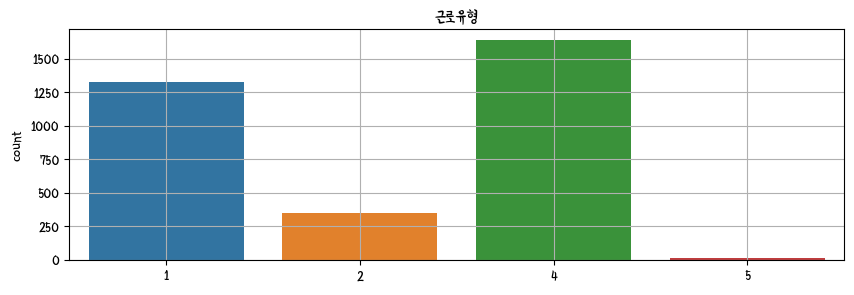

In [23]:
visual=data[['근로유형']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("근로유형")
plt.grid()
plt.show()

#### 변수변경
|변경된 변수|이전 변수|
|--|--|
|4.근로능력 있는 미취업자|4.근로능력 있는 미취업자|
||5.근로능력 없는 미취업자|

In [24]:
trans=lambda x:4 if x>=5 else x
data["근로유형"]=data["근로유형"].apply(trans)

#### 변경 후 시각화

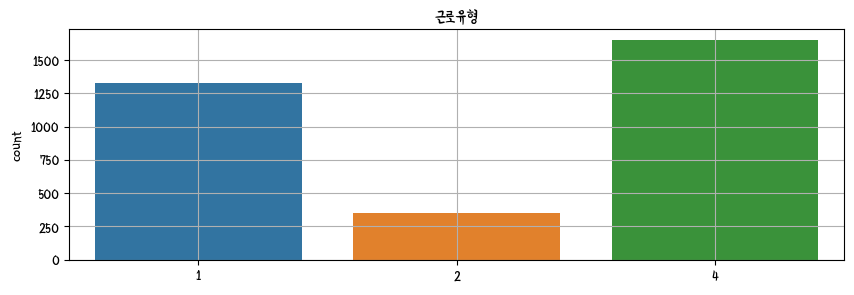

In [25]:
visual=data[['근로유형']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("근로유형")
plt.grid()
plt.show()

#### 변경 후 독립성 검정

In [26]:
result3=chi2.chi2_try(data[col3])

In [27]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result3["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[(마)직업 만족도, 근로유형]",2.276229e-76,False


## 가족 만족도

In [28]:
col4=["혼인상태",'(나)가족의 수입 만족도', '(라)가족관계 만족도']
other.extend([x for x in col4 if x not in already])

#### 상관관계
> 서열척도

In [29]:
data[['(나)가족의 수입 만족도', '(라)가족관계 만족도']].corr()

,(나)가족의 수입 만족도,(라)가족관계 만족도
(나)가족의 수입 만족도,1.000000,0.360057
(라)가족관계 만족도,0.360057,1.000000


#### 독립성 검정

In [30]:
result4=chi2.chi2_try(data[col4])

In [31]:
result4["type4"]

[{'Pairs': ['혼인상태', '(나)가족의 수입 만족도'],
  'DataFrame': (나)가족의 수입 만족도          1           2           3           4          5
  혼인상태                                                                   
  1              13.807738  109.206659  192.750450  141.982603   7.252549
  2              53.003899  419.212657  739.913017  545.029994  27.840432
  3              15.173665  120.009898  211.818236  156.028194   7.970006
  4               1.811338   14.326035   25.285543   18.625675   0.951410
  5              15.203359  120.244751  212.232753  156.333533   7.985603,
  'pvalue': 1.4533466013484173e-27,
  'dof': 16}]

In [32]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result4["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[혼인상태, (라)가족관계 만족도]",2.890382e-54,False
1,"[(나)가족의 수입 만족도, (라)가족관계 만족도]",5.819932e-150,False


#### 대표본 가정을 만족하지 못함
> 혼인상태가 문제

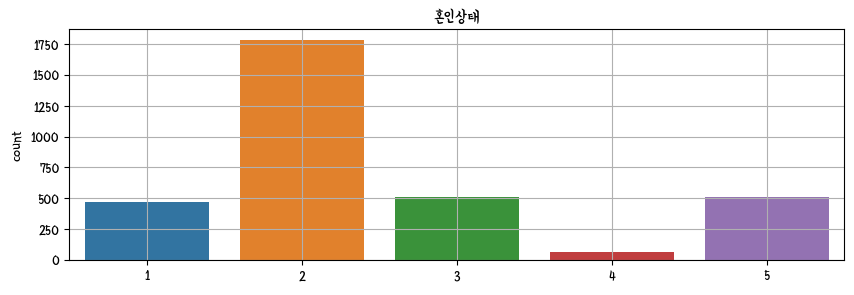

In [33]:
visual=data[['혼인상태']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("혼인상태")
plt.grid()
plt.show()

#### 변수변경
|변경된 변수|이전 변수|
|--|--|
|1.유배우|1.유배우|
||4.별거|

In [34]:
trans=lambda x:1 if x==4 else x
data["혼인상태"]=data["혼인상태"].apply(trans)

#### 변경 후 시각화

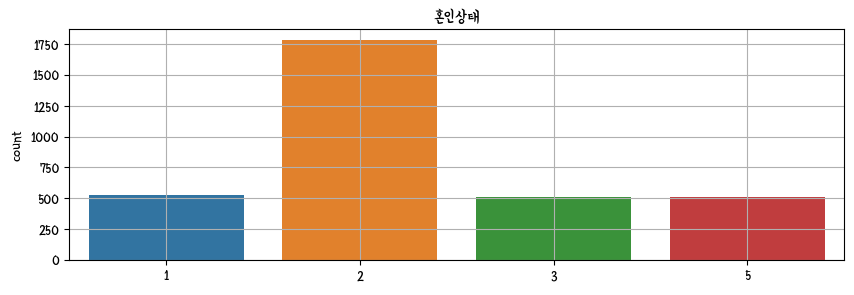

In [35]:
visual=data[['혼인상태']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("혼인상태")
plt.grid()
plt.show()

#### 변경 후 독립성 검정

In [36]:
result4=chi2.chi2_try(data[col4])

In [37]:
pvalues=[(x['Pairs'],x['pvalue']) for x in result4["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[혼인상태, (나)가족의 수입 만족도]",7.507794e-26,False
1,"[혼인상태, (라)가족관계 만족도]",2.503669e-49,False
2,"[(나)가족의 수입 만족도, (라)가족관계 만족도]",5.819932e-150,False


## 결론
카테고리 내에서 독립적인 변수들을 찾읗 수 없었다

In [39]:
final=chi2.chi2_try(data[other])

In [40]:
pvalues=[(x['Pairs'],x['pvalue']) for x in final["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[만성질환, 건강상태]",2.557166e-229,False
1,"[만성질환, 집의 (등기상) 점유형태]",2.700940e-30,False
2,"[만성질환, 근로유형]",5.267645e-59,False
3,"[만성질환, 혼인상태]",6.077431e-252,False
4,"[건강상태, 주택유형]",2.566076e-39,False
5,"[건강상태, 집의 (등기상) 점유형태]",2.218301e-22,False
6,"[건강상태, 근로유형]",1.579390e-75,False
7,"[건강상태, 혼인상태]",2.290605e-191,False
8,"[주택유형, 집의 (등기상) 점유형태]",0.000000e+00,False
9,"[주택유형, 근로유형]",2.587738e-81,False


### type3 문제 한쌍만 발생함

In [46]:
final["type3"][0]["Pairs"]

['만성질환', '주택유형']

### 시각화
> 1,2에 해당되는 사람이 너무 적음

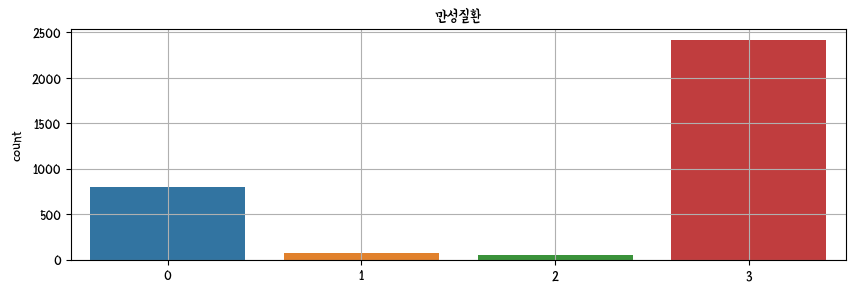

In [47]:
visual=data[['만성질환']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("만성질환")
plt.grid()
plt.show()

In [50]:
# 만성질환을 복용여부로 바꾸기
data["만성질환"]=data["만성질환"].apply(lambda x:1 if x>=1 else 0)

### 변경 후 시각화

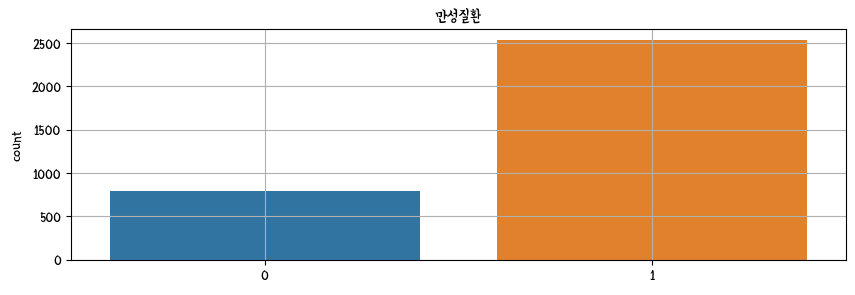

In [51]:
visual=data[['만성질환']].value_counts().to_frame().sort_index()
visual.index=list(map(lambda x:x[0],visual.index))
plt.figure(figsize=(10,3))
sb.barplot(data=visual,x=visual.index,y=visual["count"])
plt.title("만성질환")
plt.grid()
plt.show()

### 변경 후 카이제곱 검정

In [52]:
final=chi2.chi2_try(data[other])

In [53]:
pvalues=[(x['Pairs'],x['pvalue']) for x in final["Pass"]]
Indep=pd.DataFrame(index=range(len(pvalues)),data=pvalues)
Indep.rename(columns={0:'검정대상',1:'pvalue'},inplace=True)
Indep["독립성"]=Indep["pvalue"]>=0.05
Indep

,검정대상,pvalue,독립성
0,"[만성질환, 건강상태]",4.640433e-211,False
1,"[만성질환, 주택유형]",3.987624e-46,False
2,"[만성질환, 집의 (등기상) 점유형태]",1.349388e-31,False
3,"[만성질환, 근로유형]",7.367597e-55,False
4,"[만성질환, 혼인상태]",9.747568e-234,False
5,"[건강상태, 주택유형]",2.566076e-39,False
6,"[건강상태, 집의 (등기상) 점유형태]",2.218301e-22,False
7,"[건강상태, 근로유형]",1.579390e-75,False
8,"[건강상태, 혼인상태]",2.290605e-191,False
9,"[주택유형, 집의 (등기상) 점유형태]",0.000000e+00,False


In [57]:
data.to_excel("./카테고리_소분류완료.xlsx")